<a href="https://colab.research.google.com/github/siggu/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_8_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. 판다스 데이터프레임

**기본 설정**

In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

PREVIOUS_MAX_ROWS = pd.options.display.max_rows # 원래 60이 기본.
pd.set_option("max_rows", 20)

## 8.1. 시리즈
**시리즈**는 1차원 어레이와 동일한 구조를 갖는다. 다만 인덱스를 0, 1, 2 등이 아닌 임의의 값으로 지정할 수 있으며 항상 함께 고려해야 한다.

### 8.1.1. 시리즈 생성과 인덱스
시리즈를 생성하기 위해 리스트, 넘파이 1차원 어레이,사전 등을 이용할 수 있다.

**리스트와 어레이 활용**

1차원 리스트 또는 어레이를 이용하여 간단하게 시리즈를 생성할 수 있다. 그러면 지정된 순서대로 0, 1, 2 등의 인덱스가 자동 생성되어 함께 보여진다.

- 인덱스 : 별도로 지정하지 않으면 리스트, 넘파이 어레이 등에서 사용된 인덱스가 기본으로 사용됨.

- `dtype` : 사용된 항목의 자료형을 가리키며 모든 항목은 동일한 자료형을 가져야 함.

아래 코드는 리스트를 이용하여 시리즈를 생성한다.

In [2]:
obj1 = pd.Series([4, 7, -5, 3])
obj1

0    4
1    7
2   -5
3    3
dtype: int64

1차원 어레이도 이용할 수 있다.

In [3]:
obj1 = pd.Series(np.array([4, 7, -5, 3]))
obj1

0    4
1    7
2   -5
3    3
dtype: int64

항목으로 사용된 값들은 `values` 속성이 넘파이 어레이로 저장된다.

In [4]:
obj1.values

array([ 4,  7, -5,  3])

사용된 인덱스는 `index` 속성이 갖고 있다. 자동으로 생성된 경우 인덱스는 `range`와 유사한 `RangeIndex` 자료형이다.

In [5]:
obj1.index

RangeIndex(start=0, stop=4, step=1)

기존에 사용된 인덱스를 완전히 새로운 인덱스로 대체할 수도 있다.

In [6]:
obj1

0    4
1    7
2   -5
3    3
dtype: int64

In [7]:
obj1.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj1

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

**인덱스 지정**

인덱스를 지정하면서 시리즈를 생성할 수 있다.

- `index` 키워드 인자 : 항목의 수와 동일한 길이를 갖는 리스트, 리스트에 포함된 항목 순서대로 인덱스 지정.

인덱스가 지정된 순서대로 사용됨에 주의하라.

In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

특정 인덱스를 지정하면 인덱스의 자료형은 `Index` 객체가 된다.

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

**사전 활용**

사전을 이용하여 시리즈를 생성할 수 있다.

- 키 : 인덱스
- 값 : 값

In [10]:
sdata= {'Ohio' : 35000, 'Texas' : 71000, 'Oregon' : 16000, 'Utah' : 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

사전을 이용하더라도 인덱스를 따로 지정할 수 있다. 그러면 사전에 키로 사용되지 않은 인덱스는 누락되었다는 의미로 `NaN`이 표시된다. 또한 인덱스 리스트에 포함되지 않는 사전의 키는 포함되지 않는다.

- `California` : `sdata` 사전에 키로 사용되지 않았기에 `NaN`으로 지정
- `Utah` : `states` 리스트에 포함되지 않았기에 생성된 시리즈에 사용되지 않음.

In [11]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

역으로 시리즈를 사전으로 변환할 수도 있다.

- 인덱스 : 키
- 값 : 값

In [12]:
dict(obj4)

{'California': nan, 'Ohio': 35000.0, 'Oregon': 16000.0, 'Texas': 71000.0}

`name` 속성

`Series` 객체와 시리즈의 `Index` 객체 모두 `name` 속성을 이용하여 사용되는 값들에 대한 정보를 저장한다. 아래 코드는 시리즈에 대해선 `name='population'`(인구)을, 시리즈의 인덱스에 대해선 `Index='state'`(주 이름)을 지정한다.

In [13]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

### 8.1.2. 시리즈 연산

**연산 및 유니버설 함수 적용**

연산 및 유니버설 함수 적용 방식도 기본적으로 넘파이 어레이의 경우처럼 항목별로 작동한다.

In [14]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [15]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

**`in` 연산자**

`in` 연산자는 인덱스 사용 여부를 사전 자료형의 키(key) 사용 여부와 동일한 방식으로 판단한다.

In [16]:
'b' in obj2

True

In [17]:
'e' in obj2

False

**결측치 사용 여부 확인**

`pd.isnull()` 함수는 누락된 항목은 `True`, 아니면 `False`로 지정하여 단번에 결측치가 포함되었는지 여부를 확인해준다.

In [18]:
pd.isnull(obj4)

state
California     True
Ohio          False
Oregon        False
Texas         False
Name: population, dtype: bool

`pd.notnull()` 함수는 누락된 항목은 `False`, 아니면 `True`로 지정하여 단번에 결측치가 포함되었는지 여부를 확인해준다.

In [19]:
pd.notnull(obj4)

state
California    False
Ohio           True
Oregon         True
Texas          True
Name: population, dtype: bool

두 함수를 호출하면 실제로는 시리즈 객체의 메서드인 `insull()` 또는 `notnull()`이 내부에서 호출된다.

In [20]:
obj4.isnull()

state
California     True
Ohio          False
Oregon        False
Texas         False
Name: population, dtype: bool

In [21]:
obj4.notnull()

state
California    False
Ohio           True
Oregon         True
Texas          True
Name: population, dtype: bool

`any()`와 `all()`

`any()` 또는 `all()` 메서드를 활용하면 결측치 사용 여부를 단번에 알 수 있다. 예를 들어, `pd.isnulll()`과 `any()` 메서드의 활용 결과가 `True`이면 결측치가 있다는 의미이다.

In [22]:
obj4.isnull().any()

True

반면에 `pd.notnull()`과 `all()` 메서드이 활용 결과가 `False`이면 역시 결측치가 있다는 의미이다.

In [23]:
obj4.notnull().all()

False

넘파이의 `any()`, `all()`을 활용해도 동일한 결과를 얻는다.

In [24]:
np.any(obj4.isnull())

True

In [25]:
np.all(obj4.notnull())

False

**시리즈 연산과 인덱스**

시리즈 연산 과정에서 모든 시리즈에 공통으로 사용되는 인덱스의 항목에 대해서만 연산이 이루어진다. 그렇지 않은 인덱스는 추가되기는 하지만 `NaN`으로 값이 지정된다.

`obj3`에 `California` 정보가 없다.

In [26]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

`obj4`에 `Utah` 정보가 없다.

In [27]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

두 시리즈의 덧셈 결과엔 `California`와 `Utah`의 정보가 `NaN`으로 처리된다.

In [28]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

### 8.1.3. 시리즈 인덱싱

인덱스를 이용한 인덱싱이 리스트, 어레이 방식과 동일하게 작동한다.

In [29]:
obj2['a']

-5

인덱스가 가리키는 값을 변경할 수도 있다.

In [30]:
obj2['d'] = 6

obj2

d    6
b    7
a   -5
c    3
dtype: int64

인덱스의 리스트를 이용한 인덱싱의 결과는 지정된 인덱스가 사용되는 시리즈다. 단, 지정된 인덱스의 순서를 고려하여 시리즈가 생성된다.

In [31]:
obj2_1 = obj2[['c', 'a', 'd']]
obj2_1

c    3
a   -5
d    6
dtype: int64

부울 인덱싱은 넘파이 어레이의 경우와 동일하게 작동한다. 예를 들어 아래 코드는 양수만 구성된 시리즈가 생성된다.

In [32]:
mask = obj2 > 0
obj2[mask]

d    6
b    7
c    3
dtype: int64

## 8.2 데이터 프레임
**데이터프레임**은 인덱스를 공유하는 여러 개의 시리즈를 다루는 객체이다. 아래 그림은 세 개의 시리즈를 하나의 데이터프레임으로 만든 결과를 보여준다.

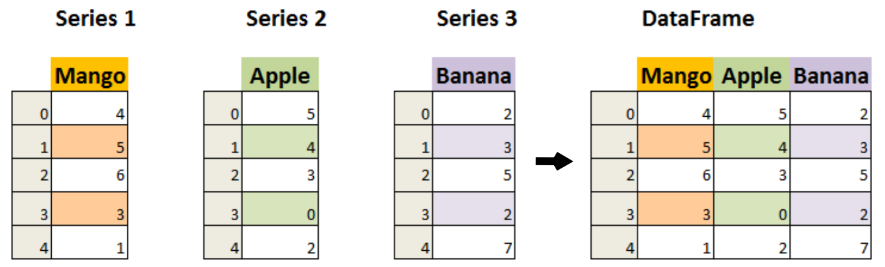

위 이미지에 있는 세 개의 시리즈는 다음과 같으며, `name` 속성을 이용하여 각 시리즈의 이름도 함께 지정한다.

In [33]:
series1 = pd.Series([4, 5, 6, 3, 1], name="Mango")
series1

0    4
1    5
2    6
3    3
4    1
Name: Mango, dtype: int64

In [34]:
series2 = pd.Series([5, 4, 3, 0, 2], name="Apple")
series2

0    5
1    4
2    3
3    0
4    2
Name: Apple, dtype: int64

In [35]:
series3 = pd.Series([2, 3, 5, 2, 7], name="Banana")
series3

0    2
1    3
2    5
3    2
4    7
Name: Banana, dtype: int64

### 8.2.1. 데이터프레임 생성

**시리즈 사전 활용**

시리즈를 값으로 갖는 사전(`dict`)을 이용하여 데이터프레임 객체를 생성할 수 있다. 위 세 개의 시리즈를 하나의 데이터프레임으로 묶기 위해 키(key)는 각 시리즈의 `name`으로, 값(value)은 해당 시리즈의 지정된 아래 사전을 이용한다.

In [36]:
{"Mango":series1, "Apple":series2, "Banana":series3}

{'Apple': 0    5
 1    4
 2    3
 3    0
 4    2
 Name: Apple, dtype: int64, 'Banana': 0    2
 1    3
 2    5
 3    2
 4    7
 Name: Banana, dtype: int64, 'Mango': 0    4
 1    5
 2    6
 3    3
 4    1
 Name: Mango, dtype: int64}

그런데 각 시리즈의 이름 모두 `name` 속성에 저장되어 있다.

In [37]:
series1.name

'Mango'

In [38]:
series2.name

'Apple'

In [39]:
series3.name

'Banana'

따라서 아래처럼 바로 `name` 속성을 키로 저장한 후 데이터프레임을 생성할 수 있다.

In [40]:
dict1 = {series1.name:series1, series2.name:series2, series3.name:series3}
frame1 = pd.DataFrame(dict1)
frame1

,Mango,Apple,Banana
0,4,5,2
1,5,4,3
2,6,3,5
3,3,0,2
4,1,2,7


`pd.concat()` 함수 활용

`pd.concat()` 함수도 여러 개의 시리즈를 묶어 하나의 데이터프레임을 생성한다. 단, 축을 이용하여 묶는 방식을 지정한다. 위 그림에서처럼 옆으로 묶으려면 열 단위로 묶는다는 의미에서 `axis=1`로 지정한다. 각 열의 이름은 해당 시리즈의 `name`이 가리키는 값으로 지정된다.

**참고** : `concat`는 이어붙인다는 의미를 가진 concatenate 영어 단어에서 유래한다.

In [41]:
pd.concat([series1, series2, series3], axis=1)

,Mango,Apple,Banana
0,4,5,2
1,5,4,3
2,6,3,5
3,3,0,2
4,1,2,7


**리스트 사전 활용**

리스트를 값으로 갖는 사전을 이용하여 데이터프레임을 생성할 수 있다.

아래 코드에서 `data`는 `state`(주 이름), `year`(년도), `pop`(인구)을 키(key)로 사용하며, 해당 특성에 해당하는 데이터로 구성된 리스트를 값으로 갖는 사전 객체이다.

In [42]:
dict2 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada', 'NY', 'NY', 'NY'],
         'year': [2000, 2001, 2002, 2001, 2002, 2003, 2002, 2003, 2004],
         'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2, 8.3, 8.4, 8.5]}

위 사전 객체를 데이터프레임으로 변환하면 다음과 같다.

In [43]:
frame2 = pd.DataFrame(dict2)
frame2

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2
6,NY,2002,8.3
7,NY,2003,8.4
8,NY,2004,8.5


**중첩 사전 활용**

데이터프레임을 생성함에 있어서의 핵심은 2차원 행렬 모양을 갖느냐이기에 각 열에 해당하는 값으로 리스트, 어레이, 사전, 시리즈 등이 사용될 수 있다. 따라서 아래 모양의 중첩 사전을 활용하여 데이터프레임을 생성할 수 있다. 그러면 최상위 키는 열의 이름으로, 내부에 사용된 키는 행의 인덱스로 사용된다.

In [44]:
dict3 = {'Nevada' : {2001: 2.4, 2002: 2.9},
         'Ohio' : {2000: 1.5, 2001: 1.7, 2002: 3.6}}

위 중첩 사전을 이용하여 데이터프레임을 생성하면 다음과 같다. 다만, 두 사전의 키가 다름에 주의하라. 예를 들어, 2000 인덱스의 Nevada의 경우는 결측치로 처리된다.

In [45]:
frame3 = pd.DataFrame(dict3)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


하나의 사전을 시리즈로 본다면 여러 개의 사전으로 이루어진 사전을 이용하여 생성된 데이터프레임은 여러 개의 시리즈를 이어붙여서 생성한 데이터프레임으로 간주할 수 있다. 실제로 아래 두 개의 시리즈를 합친 결과와 동일함을 확인할 수 있다.

In [46]:
nevada = pd.Series({2001: 2.4, 2002: 2.9}, name="Nevada")
nevada

2001    2.4
2002    2.9
Name: Nevada, dtype: float64

In [47]:
ohio = pd.Series({2000: 1.5, 2001: 1.7, 2002: 3.6}, name="Ohio")
ohio

2000    1.5
2001    1.7
2002    3.6
Name: Ohio, dtype: float64

이제 두 시리즈를 합치면 위 결과와 동일하다. 단, 행 인덱스가 정렬되서 보이는 점만 조금 다르다. 행과 열을 기준으로 정렬하는 작업은 나중에 설명한다.

In [48]:
pd.concat([nevada, ohio], axis=1)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


`name` 속성

시리즈의 경우와 동일한 방식으로 행과 열의 이름을 지정할 수 있다.

In [49]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


`values` 속성

항목들로 이루어진 2차원 어레이는 `values` 속성이 가리킨다.

In [54]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [56]:
frame2.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2],
       ['NY', 2002, 8.3],
       ['NY', 2003, 8.4],
       ['NY', 2004, 8.5]], dtype=object)

## 8.2.2. `columns`와 `index`

`columns` 속성

`columns` 속성을 이용하여 열의 순서를 지정할 수 있다.

In [57]:
pd.DataFrame(dict2, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2
6,2002,NY,8.3
7,2003,NY,8.4
8,2004,NY,8.5


새로운 열을 추가할 수도 있다. 이름만 지정할 경우 항목은 모두 `NaN`으로 처리된다.

In [60]:
frame2 = pd.DataFrame(dict2, columns=['year', 'state', 'pop', 'debt'])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN
6,2002,NY,8.3,NaN
7,2003,NY,8.4,NaN
8,2004,NY,8.5,NaN


또는 사전에 항목을 추가하듯이 진행할 수 있다.

**주의사항** : `frame2`와의 충돌을 피하기 위해 복사해서 사용한다.

In [61]:
frame2_ = frame2.copy()
frame2_["debt"] = np.linspace(0, 1, 9)

frame2_

,year,state,pop,debt
0,2000,Ohio,1.5,0.000
1,2001,Ohio,1.7,0.125
2,2002,Ohio,3.6,0.250
3,2001,Nevada,2.4,0.375
4,2002,Nevada,2.9,0.500
5,2003,Nevada,3.2,0.625
6,2002,NY,8.3,0.750
7,2003,NY,8.4,0.875
8,2004,NY,8.5,1.000


`columns` 속성을 확인하면 다음과 같다.

In [62]:
frame2_.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

`index` 속성

인덱스를 지정하려면 `index` 속성을 이용한다.

In [63]:
frame2 = pd.DataFrame(dict2, index=['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])

frame2

,state,year,pop
one,Ohio,2000,1.5
two,Ohio,2001,1.7
three,Ohio,2002,3.6
four,Nevada,2001,2.4
five,Nevada,2002,2.9
six,Nevada,2003,3.2
seven,NY,2002,8.3
eight,NY,2003,8.4
nine,NY,2004,8.5


물론 `columns`, `index` 등 여러 속성을 동시에 지정할 수도 있다.

In [64]:
frame2 = pd.DataFrame(dict2, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


**중복 인덱스**

인덱스를 중복해서 사용할 수도 있다.

In [67]:
dup_labels = pd.Index(['one', 'two', 'two', 'three', 'three', 'three'])

dup_labels

Index(['one', 'two', 'two', 'three', 'three', 'three'], dtype='object')

In [69]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


In [70]:
pd.DataFrame(frame2, index=dup_labels)

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
three,2002,Ohio,3.6,NaN
three,2002,Ohio,3.6,NaN


`Index` 객체

시리즈의 데이터프레임의 `index`와 `columns` 속성에 저장된 값은 `Index` 객체다.

In [71]:
obj = pd.DataFrame(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [72]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

인덱스 객체는 1차원 어레이와 유사하게 동작한다. 예를 들어, 인덱싱과 슬라이싱은 리스트 또는 1차원 어레이의 경우와 동일하게 작동한다.

In [73]:
index[1]

'b'

In [74]:
index[1:]

Index(['b', 'c'], dtype='object')

하지만 항목을 변경할 수는 없다. 아래처럼 인덱싱을 이용하여 변경하려 하면 `TypeError`가 발생한다.

In [75]:
index[1] = 'd'

TypeError: ignored

## 8.2.3. 데이터프레임 인덱싱

**열 인덱싱**

열 인덱싱은 시리즈, 사전 등과 동일한 방식을 사용한다. 다만, 지정된 열의 이름을 사용한다. 예를 들어, `state` 열을 확인하면 시리즈로 보여준다.

In [76]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
seven        NY
eight        NY
nine         NY
Name: state, dtype: object

대괄호 대신 속성 형식을 사용할 수도 있다. 아래 코드는 `year` 열을 시리즈로 보여준다.

In [77]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
seven    2002
eight    2003
nine     2004
Name: year, dtype: int64

**주의사항** : 대괄호를 사용하는 인덱싱은 임의의 문자열을 사용한다. 반면에 속성 형식은 변수를 사용하듯이 처리한다. 따라서 속성 형식에 사용될 수 있는 열의 이름은 일반 변수로 이름을 짓는 형식을 따라야 한다.

예를 들어, Ohio 주(state)인지 여부를 판정하는 'Ohio state'라는 열을 추가해보자. 아래 코드는 새로운 열을 추갛기 위해 사전의 경우처럼 대괄호를 이용하여 새로운 열과 이름과 값을 지정한다.

In [79]:
frame2['Ohio state'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,Ohio state
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False
seven,2002,NY,8.3,NaN,False
eight,2003,NY,8.4,NaN,False
nine,2004,NY,8.5,NaN,False


그러면 `'Ohio state'`의 열을 확인하는 방법은 대괄호만 이용할 수 있으며 속성 형식은 불가능하다.

In [80]:
frame2['Ohio state']

one       True
two       True
three     True
four     False
five     False
six      False
seven    False
eight    False
nine     False
Name: Ohio state, dtype: bool

아래와 같이 실행하면 문법 오류(`SyntaxError`)가 발생한다. 이유는 `Ohio state`가 변수 이름으로 허용되지 않기 때문이다.

In [81]:
frame2.Ohio state

SyntaxError: ignored

**열 삭제**

하나의 열을 삭제하려면 `del` 예약어를 사용한다.

In [82]:
del frame2['Ohio state']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


In [85]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

`drop()` 메서드를 사용할 수도 있지만 나중에 설명한다.

**행 인덱싱**

행 인덱싱은 `loc` 속성과 지정된 인덱스를 이용한다. 예를 들어, `'three'` 행을 확인하려면 다음과 같이 한다.

In [87]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

여러 행을 대상으로 인덱싱 하려면 아래와 같이 인덱스의 리스트를 활용한다.

In [88]:
frame2.loc[['three', 'four']]

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN


**참고** : 행, 열 인덱싱 모두 0, 1, 2 등 정수를 이용하년 방식도 가능하며, 나중에 자세히 다룬다.

**열 업데이트**

열 인덱싱을 이용하여 항목의 값을 지정할 수 있다. 아래 코드는 `'debt'` 열의 값을 16.5로 일정하게 지정한다.

**참고** : 브로드캐스팅이 기본적으로 작동한다.

In [89]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5
seven,2002,NY,8.3,16.5
eight,2003,NY,8.4,16.5
nine,2004,NY,8.5,16.5


반면에 행의 길이와 동일한 리스트, 어레이 등을 이용하여 각 행별로 다른 값을 지정할 수 있다. 리스트, 어레이의 길이가 행의 개수와 동일해야 함에 주의해야 한다.

In [90]:
frame2['debt'] = np.arange(9.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0
seven,2002,NY,8.3,6.0
eight,2003,NY,8.4,7.0
nine,2004,NY,8.5,8.0


반면에 시리즈를 이용하여 특정 열의 값을 지정할 수 있으며, 이 때는 항목의 길이가 행의 개수와 동일할 필요가 없다. 다만, 지정된 행의 인덱스 값만 삽입되며 나머지는 `NaN`이 삽입된다.

In [94]:
val = pd.Series([-1.2, -1.5, -1.7, 2.2], index=['two', 'four', 'five', 'eleven'])
val

two      -1.2
four     -1.5
five     -1.7
eleven    2.2
dtype: float64

위 시리즈를 이용하여 `'debt'` 열의 값을 업데이트하면 다음과 같다.

- `'two'`, `'four'`, `'five'` 행은 지정된 값으로 업데이트
- 나머지 인덱스의 값은 결측치로 처리됨.
- `'eleven'`에 해당하는 값은 무시됨. 이유는 `frame2`의 인덱스로 포함되지 않기 때문

In [95]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


## 8.2.4. 데이터프레임 연산

`in` 연산자

인덱스와 열에 대한 특정 이름의 사용 여부는 `in` 연산자를 이용하여 확인한다.

In [96]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


In [97]:
'year' in frame2.columns

True

In [98]:
'ten' in frame2.index

False

`head()` 메서드

`head()` 메서드는 지정된 크기만큼의 행을 보여준다. 인자를 지정하지 않으면 처음 6개의 행을 보여준다.

In [101]:
frame2.head(3)

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN


In [100]:
frame2.head()

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


`tail()` 메서드

`tail()` 메서드는 지정된 크기만큼의 행을 뒤에서부터 보여준다. 인자를 지정하지 않으면 뒤에서부터 5개의 행을 보여준다.

In [102]:
frame2.tail(3)

,year,state,pop,debt
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


In [103]:
frame2.tail()

,year,state,pop,debt
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN
seven,2002,NY,8.3,NaN
eight,2003,NY,8.4,NaN
nine,2004,NY,8.5,NaN


**전치 데이터프레임**

2차원 행렬의 전치 행렬처럼 전치 데이터프레임은 행과 열의 위치를 바꾼 결과이다. 당연히 행과 열에 사용된 이름이 적절하게 전치된다.

In [104]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [105]:
frame3.T

year,2001,2002,2000
state,,,
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5
